# 2019310155 소프트웨어학과 서강민
# 머신러닝과딥러닝 Term Project

# 1. 문제 설명

라이엇 게임즈에서 개발한 '리그 오브 레전드(League of Legends)'라는 게임은 현재 전 세계에서 가장 인기 있는 게임이다. 리그 오브 레전드(=롤, LoL)는 주로 5대 5 멀티플레이어 팀전으로 진행되며, 대칭형으로 되어 있는 전장에서 자신의 캐릭터를 성장시키고 상대 팀 플레이어들과 맞서 싸워 상대 팀의 기지를 파괴하면 승리하는 게임이다.

게임의 흥행과 더불어 게임의 전체적인 시스템이 더욱 정교해지고 E스포츠 리그 또한 큰 규모로 발전해 나가면서 롤에 관한 통계 데이터 또한 사람들의 큰 관심사가 되었다. 현재 롤 게임에 관한 다양한 데이터들을 분석해서 승리에 관한 유용한 정보를 제공하는 웹사이트들이나 유튜브 채널들도 많이 생겨나고 있다.

리그 오브 레전드는 보통 25분~30분 사이에 게임이 끝나는 편인데, '캐릭터의 성장'이라는 요소가 있어서 게임 초반에 벌어진 팀의 성장 격차가 게임이 끝날 때 까지 승패에 중요한 영향을 미친다. 때문에 프로 리그 분석가들도 경기 시작 후 10분까지의 데이터를 팀을 평가하는 매우 중요한 지표로 생각한다.

나는 여기서 이 10분까지의 데이터를 바탕으로 실제 승패 결과, 승률을 예측할 수 있다면 프로 경기를 분석할 때에도 유용하게 사용할 수 있고, 내가 롤을 플레이할 때에도 예측된 승률을 바탕으로 앞으로 어떻게 플레이해야 할지(리스크를 감수하고 역전을 노릴지, 안전하게 행동할지 등)를 정할 수 있을 것이다.



# 2. 문제와 관련된 데이터 설명

kaggle에서 내려받은 dataset으로, 리그 오브 레전드의 다이아몬드 티어(약 상위 1~2%, 게임 실력이 매우 높은 플레이어)에서 진행된 경기들을 기준으로 수집되었다.  게임 시작 이후 10분까지의 양 팀이 기록한 각종 데이터들과, 그 경기에서의 승패 여부가 기록되어 있다.

## column 설명

column은 총 40개로, 2개의 메타데이터와 각 팀당 19개씩 총 38개의 팀별 데이터가 기록되어 있다.


gameId - 게임 별 고유한 ID 번호이다. Riot 게임사의 API로 추가 정보를 얻어올 수 있지만, 이번 Term Project에서는 현재 파일에 있는 정보만을 활용해 예측 모델을 구성하기로 했다. 따라서 gameId는 학습에 사용되지 않는다.

blueWins - 블루 팀이 승리했다면 1, 그렇지 않았다면 0이 기록되어 있다. 학습 레이블 데이터(Y)로 활용된다.

이 이후부터는 블루 팀, 레드 팀 기준으로 각각 column들이 두개 씩 존재한다.

blueWardsPlaced - 블루 팀이 설치한 와드 토템의 개수이다. 와드 토템은 게임 맵에서 원하는 곳의 시야를 밝혀 주는 역할을 한다.

blueWardsDestroyed - 레드 팀(상대 팀)이 설치한 와드 토템을 블루 팀이 파괴한 횟수이다. 상대 팀의 와드 토템을 파괴하면 상대의 시야를 차단할 수 있다.

blueFirstBlood - 블루 팀이 게임에서 첫 플레이어 처치(퍼스트 블러드)를 기록했다면 1, 그렇지 않다면 0이 기록되어 있다.

blueKills - 블루 팀이 기록한 플레이어 처치 수이다.

blueDeaths - 블루 팀이 기록한 사망 횟수이다.

blueAssists - 블루 팀이 기록한 플레이어 처치 도움 횟수이다.

blueEliteMonsters - 블루 팀이 기록한 엘리트 등급 몬스터 처치 횟수이다. 엘리트 등급 몬스터는 처치 시 플레이어에게 이로운 효과를 주거나 상대 팀 기지 파괴를 돕는 등 게임 승리에 큰 도움을 준다.

blueDragons - 블루 팀이 기록한 드래곤(엘리트 등급 몬스터) 처치 횟수이다.

blueHeralds - 블루 팀이 기록한 협곡의 전령(엘리트 등급 몬스터) 처치 횟수이다.

blueTotalGold - 블루 팀이 벌어들인 총 골드 양이다. 골드는 게임 내에서 캐릭터의 성장과 관련된 중요한 재화이다.

blueAvgLevel - 블루 팀 캐릭터들의 평균 레벨이다.

blueTotalExperience - 블루 팀 캐릭터들의 총 경험치양이다.

blueTotalMinionsKilled - 블루 팀의 총 미니언 처치 수이다. 미니언 처치 수, 정글 몬스터 처치 수는 골드, 경험치량과 크게 연관된다.

blueTotalJungleMinionsKilled - 블루 팀의 총 정글 몬스터 처치 수이다.

blueGoldDiff - 블루 팀이 레드 팀에 비해 벌어들인 골드 차이이다.

blueExperienceDiff - 블루 팀이 레드 팀에 비해 획득한 경험치 차이이다.

blueCSPerMin - 블루 팀의 분당 CS 점수(미니언 처치 수 & 정글 몬스터 처치 수)이다.

blueGoldPerMin - 블루 팀의 분당 골드 획득량이다.


# 3. 문제해결 방법 설명

우선 간단한 Logistic Regression 모델을 적용하여 승패를 예측해보기로 했다.


# 4. 위의 방법을 데이터에 적용하여 얻은 결과

# 5. 결과에 대한 해석

In [1]:
# 구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기, gameId column 제거
df_all = pd.read_csv('/content/gdrive/My Drive/data/high_diamond_ranked_10min.csv')
df_all = df_all.drop(['gameId'], axis='columns')

df_data = df_all.iloc[:, 1:]
df_label = df_all.iloc[:, 0]

print(df_all.columns)
print(df_data.shape)
print(df_label.shape)

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
(9879, 38)
(9879,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7903, 38)
(1976, 38)
(7903,)
(1976,)


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
prediction = model.predict(X_test)

acc = 100 * accuracy_score(y_test, prediction)
pre = 100 * precision_score(y_test, prediction)
rec = 100 * recall_score(y_test,prediction)
f1 = 100 * f1_score(y_test,prediction)

print('Accuracy : %.2f%%'%(acc))
print('Precision: %.2f%%\nRecall: %.2f%%\nF1-score: %.2f%% '%(pre, rec, f1))

Accuracy : 72.87%
Precision: 73.23%
Recall: 71.14%
F1-score: 72.17% 


In [23]:
#cut off 조절에 따른 모델의 성능을 평가해 보기 위하여 cut off 값 생성 및 각각의 성능 지표 도출
#cut off 값은 다양하게 선택 가능.
list = []
for i in np.linspace(0,1,100):
    pred = model.predict_proba(X_test)[:,1] > i
    cf_mtx = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    tpr = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_test, pred)
    list.append([i, acc, f1, tpr, fpr])

cut_off = pd.DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "TPR", "FPR"]
cut_off

,CUTOFF,ACC,F1,TPR,FPR
0,0.000000,0.494433,0.661700,0.000000,0.000000
1,0.010101,0.495951,0.662373,0.003003,0.000000
2,0.020202,0.497470,0.663047,0.006006,0.000000
3,0.030303,0.501518,0.664852,0.014014,0.000000
4,0.040404,0.508603,0.668034,0.028028,0.000000
...,...,...,...,...,...
95,0.959596,0.521761,0.063429,1.000000,0.967247
96,0.969697,0.518725,0.051844,1.000000,0.973388
97,0.979798,0.514676,0.036181,1.000000,0.981576
98,0.989899,0.507085,0.006122,1.000000,0.996929


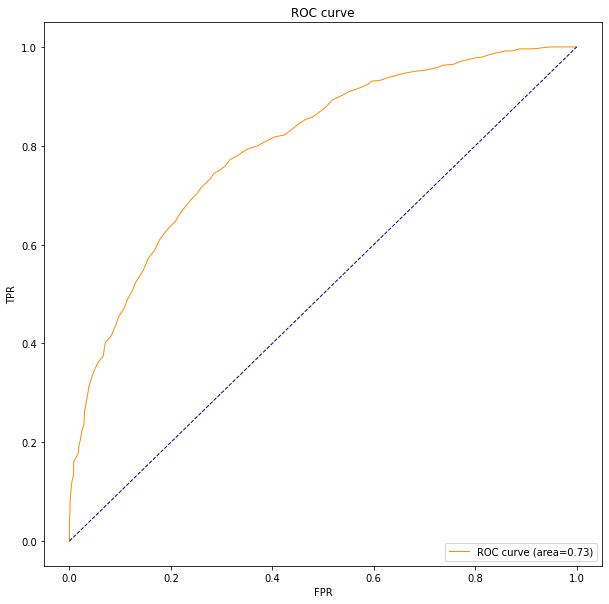

In [24]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["TPR"], color="darkorange", lw=1, label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [25]:
cut_off[cut_off["ACC"] == cut_off["ACC"].max()] #accuracy가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
49,0.494949,0.729757,0.723602,0.743744,0.284545
